# Experiment 3 - Ephemeral/non-ephemeral n-think performance as a function of n

## Preliminary actions

In [ ]:
! tar czf Experiments.tar *

In [ ]:
! nvidia-smi

In [1]:
import pickle
import random
import math

In [ ]:
import sys
sys.path.append("../Self-evaluation")

from self_evaluation import play, LLMAgentSelfEvaluate

# Notebook variables

In [2]:
exp_number = 3

seeds = range(1,21)
n_episodes = 1
max_steps = 100
game = "simple"
n_think_indices = range(0,16)

In [3]:
# retrieve max scores of seeds 1-50 of tw-simple
with open(f"./Experiment 1/max_scores.pickle", "rb") as f:
    max_scores = pickle.load(f)
    print("Data loaded.")

Data loaded.


# Game generation

In [ ]:
import subprocess

In [ ]:
for seed in seeds:
    subprocess.run(["tw-make", f"tw-simple",
                    "--rewards", "dense", "--goal", "detailed", "--silent", "--force",
                    "--seed", f"{seed}", "--output", f"games/{game}/seed{seed}.z8"]) 

# Game playing

In [21]:
for n in n_think_indices:
    if n < 2:
        continue # skip runs we've already done
    for ephemeral in [False, True]:
        results_all_seeds = []
        for seed in seeds:
            results = play(LLMAgentSelfEvaluate(selfeval_turns=n, reads_own_reasoning=ephemeral, verbose=False,
                                                log=f"./Experiment {exp_number}/logs/{game}/{"e" if ephemeral else ""}{n}think-seed{seed}.log"),
                    f"games/{game}/seed{seed}.z8", max_steps=max_steps, n_episodes=n_episodes)
            results_all_seeds.append(results[0]) # only one episode
        with open(f"./Experiment {exp_number}/{"e" if ephemeral else ""}{n}think_{game}.pickle", "wb") as f:
            pickle.dump(results_all_seeds, f)
            print("Data pickled.")
            f.close()

games/simple/seed1.z8 .  	avg. steps: 100.0; avg. score:  1.0 / 8.
games/simple/seed2.z8 .  	avg. steps:  17.0; avg. score: 10.0 / 10.
games/simple/seed3.z8 .  	avg. steps:  12.0; avg. score:  7.0 / 7.
games/simple/seed4.z8 .  	avg. steps:  45.0; avg. score: 10.0 / 10.
games/simple/seed5.z8 .  	avg. steps:  11.0; avg. score:  7.0 / 7.
games/simple/seed6.z8 .  	avg. steps: 100.0; avg. score:  8.0 / 10.
games/simple/seed7.z8 .  	avg. steps:   9.0; avg. score:  7.0 / 7.
games/simple/seed8.z8 .  	avg. steps:  17.0; avg. score: 10.0 / 10.
games/simple/seed9.z8 .  	avg. steps:  11.0; avg. score:  7.0 / 7.
games/simple/seed10.z8 .  	avg. steps:  12.0; avg. score:  7.0 / 7.
games/simple/seed11.z8 .  	avg. steps:   9.0; avg. score:  7.0 / 7.
games/simple/seed12.z8 .  	avg. steps: 100.0; avg. score:  8.0 / 10.
games/simple/seed13.z8 .  	avg. steps:  33.0; avg. score: 10.0 / 10.
games/simple/seed14.z8 .  	avg. steps:  11.0; avg. score:  8.0 / 8.
games/simple/seed15.z8 .  	avg. steps:  19.0; avg. 

/usr/local/lib/python3.12/site-packages/jericho/jericho.py:484: TruncatedInputActionWarning: Once converted to bytes, actions should have less than 198 characters. Action '-= Garden =-
You've just shown up in a garden. You decide to just list off a complete list of everything you see in the room, because hey, why not?



There is an unblocked exit to the north.

There is a half of a bag of chips, a bell pepper and a shovel on the floor.


>                                                                                                                                -= Garden =-9/95' was truncated to '-= Garden =-
You've just shown up in a garden. You decide to just list off a complete list of everything you see in the room, because hey, why not?



There is an unblocked exit to the north.

There'.
  warnings.warn(msg, TruncatedInputActionWarning)


.  	avg. steps: 100.0; avg. score:  9.0 / 10.
games/simple/seed3.z8 .  	avg. steps:   9.0; avg. score:  7.0 / 7.
games/simple/seed4.z8 .  	avg. steps: 100.0; avg. score:  2.0 / 10.
games/simple/seed5.z8 .  	avg. steps:  10.0; avg. score:  7.0 / 7.
games/simple/seed6.z8 .  	avg. steps: 100.0; avg. score:  8.0 / 10.
games/simple/seed7.z8 .  	avg. steps:   9.0; avg. score:  7.0 / 7.
games/simple/seed8.z8 .  	avg. steps:  25.0; avg. score: 10.0 / 10.
games/simple/seed9.z8 .  	avg. steps:  10.0; avg. score:  7.0 / 7.
games/simple/seed10.z8 .  	avg. steps:  18.0; avg. score:  7.0 / 7.
games/simple/seed11.z8 .  	avg. steps:  10.0; avg. score:  7.0 / 7.
games/simple/seed12.z8 .  	avg. steps:  13.0; avg. score: 10.0 / 10.
games/simple/seed13.z8 .  	avg. steps:  22.0; avg. score: 10.0 / 10.
games/simple/seed14.z8 .  	avg. steps: 100.0; avg. score:  7.0 / 8.
games/simple/seed15.z8 .  	avg. steps:  20.0; avg. score: 10.0 / 10.
games/simple/seed16.z8 .  	avg. steps: 100.0; avg. score:  8.0 / 10.
ga

/usr/local/lib/python3.12/site-packages/jericho/jericho.py:484: TruncatedInputActionWarning: Once converted to bytes, actions should have less than 198 characters. Action 'You put the milk on the stove.



Your score has just gone up by one point.

>                                                                                                                                -= Kitchen =-10/10' was truncated to 'You put the milk on the stove.



Your score has just gone up by one point.

>                                                                                                                        '.
  warnings.warn(msg, TruncatedInputActionWarning)


.  	avg. steps:  23.0; avg. score: 10.0 / 10.
games/simple/seed13.z8 .  	avg. steps:  31.0; avg. score: 10.0 / 10.
games/simple/seed14.z8 .  	avg. steps: 100.0; avg. score:  5.0 / 8.
games/simple/seed15.z8 .  	avg. steps:  12.0; avg. score: 10.0 / 10.
games/simple/seed16.z8 .  	avg. steps: 100.0; avg. score:  9.0 / 10.
games/simple/seed17.z8 .  	avg. steps:  16.0; avg. score: 10.0 / 10.
games/simple/seed18.z8 .  	avg. steps:  15.0; avg. score: 10.0 / 10.
games/simple/seed19.z8 .  	avg. steps: 100.0; avg. score:  6.0 / 7.
games/simple/seed20.z8 .  	avg. steps: 100.0; avg. score:  0.0 / 7.
Data pickled.
games/simple/seed1.z8 .  	avg. steps: 100.0; avg. score:  7.0 / 8.
games/simple/seed2.z8 .  	avg. steps:  16.0; avg. score: 10.0 / 10.
games/simple/seed3.z8 .  	avg. steps:  10.0; avg. score:  7.0 / 7.
games/simple/seed4.z8 .  	avg. steps: 100.0; avg. score:  2.0 / 10.
games/simple/seed5.z8 .  	avg. steps:  10.0; avg. score:  7.0 / 7.
games/simple/seed6.z8 .  	avg. steps:  25.0; avg. scor

/usr/local/lib/python3.12/site-packages/jericho/jericho.py:484: TruncatedInputActionWarning: Once converted to bytes, actions should have less than 198 characters. Action '-= Garden =-
I am so happy to announce that you are now in the garden. You begin to take stock of what's here.



You don't like doors? Why not try going north, that entranceway is unblocked.

There is a half of a bag of chips, an apple and a shovel on the floor.


>                                                                                                                                -= Garden =-9/62' was truncated to '-= Garden =-
I am so happy to announce that you are now in the garden. You begin to take stock of what's here.



You don't like doors? Why not try going north, that entranceway is unblocked.

There'.
  warnings.warn(msg, TruncatedInputActionWarning)


.  	avg. steps: 100.0; avg. score:  9.0 / 10.
games/simple/seed19.z8 .  	avg. steps:   9.0; avg. score:  7.0 / 7.
games/simple/seed20.z8 .  	avg. steps:  43.0; avg. score:  7.0 / 7.
Data pickled.
games/simple/seed1.z8 .  	avg. steps: 100.0; avg. score:  1.0 / 8.
games/simple/seed2.z8 .  	avg. steps:  21.0; avg. score: 10.0 / 10.
games/simple/seed3.z8 .  	avg. steps:   9.0; avg. score:  7.0 / 7.
games/simple/seed4.z8 .  	avg. steps: 100.0; avg. score:  2.0 / 10.
games/simple/seed5.z8 .  	avg. steps:  11.0; avg. score:  7.0 / 7.
games/simple/seed6.z8 .  	avg. steps: 100.0; avg. score:  8.0 / 10.
games/simple/seed7.z8 .  	avg. steps:  11.0; avg. score:  7.0 / 7.
games/simple/seed8.z8 .  	avg. steps:  13.0; avg. score: 10.0 / 10.
games/simple/seed9.z8 .  	avg. steps:  11.0; avg. score:  7.0 / 7.
games/simple/seed10.z8 .  	avg. steps: 100.0; avg. score:  5.0 / 7.
games/simple/seed11.z8 .  	avg. steps:  10.0; avg. score:  7.0 / 7.
games/simple/seed12.z8 .  	avg. steps:  44.0; avg. score: 10.

/usr/local/lib/python3.12/site-packages/jericho/jericho.py:484: TruncatedInputActionWarning: Once converted to bytes, actions should have less than 198 characters. Action '-= Garden =-
You arrive in a garden. An ordinary one.



There is an unblocked exit to the north.

There is a half of a bag of chips, a bell pepper, an apple and a shovel on the floor.


>                                                                                                                                -= Garden =-8/74' was truncated to '-= Garden =-
You arrive in a garden. An ordinary one.



There is an unblocked exit to the north.

There is a half of a bag of chips, a bell pepper, an apple and a shovel on the floor.


>          '.
  warnings.warn(msg, TruncatedInputActionWarning)


.  	avg. steps: 100.0; avg. score:  8.0 / 10.
games/simple/seed7.z8 .  	avg. steps:   9.0; avg. score:  7.0 / 7.
games/simple/seed8.z8 .  	avg. steps:  18.0; avg. score: 10.0 / 10.
games/simple/seed9.z8 .  	avg. steps:  11.0; avg. score:  7.0 / 7.
games/simple/seed10.z8 .  	avg. steps:  11.0; avg. score:  7.0 / 7.
games/simple/seed11.z8 .  	avg. steps:   9.0; avg. score:  7.0 / 7.
games/simple/seed12.z8 .  	avg. steps:  27.0; avg. score: 10.0 / 10.
games/simple/seed13.z8 .  	avg. steps:  27.0; avg. score: 10.0 / 10.
games/simple/seed14.z8 .  	avg. steps:  10.0; avg. score:  8.0 / 8.
games/simple/seed15.z8 .  	avg. steps:  13.0; avg. score: 10.0 / 10.
games/simple/seed16.z8 .  	avg. steps:  49.0; avg. score: 10.0 / 10.
games/simple/seed17.z8 .  	avg. steps: 100.0; avg. score:  8.0 / 10.
games/simple/seed18.z8 .  	avg. steps: 100.0; avg. score:  9.0 / 10.
games/simple/seed19.z8 .  	avg. steps:  10.0; avg. score:  7.0 / 7.
games/simple/seed20.z8 .  	avg. steps: 100.0; avg. score:  1.0 / 7

/usr/local/lib/python3.12/site-packages/jericho/jericho.py:484: TruncatedInputActionWarning: Once converted to bytes, actions should have less than 198 characters. Action '-= Garden =-
You arrive in a garden. A typical kind of place.



You need an unguarded exit? You should try going north.

There is a milk, a half of a bag of chips and a shovel on the floor.


>                                                                                                                                -= Garden =-9/52' was truncated to '-= Garden =-
You arrive in a garden. A typical kind of place.



You need an unguarded exit? You should try going north.

There is a milk, a half of a bag of chips and a shovel on the floor.


>    '.
  warnings.warn(msg, TruncatedInputActionWarning)


.  	avg. steps: 100.0; avg. score:  9.0 / 10.
games/simple/seed17.z8 .  	avg. steps:  71.0; avg. score: 10.0 / 10.
games/simple/seed18.z8 .  	avg. steps: 100.0; avg. score:  9.0 / 10.
games/simple/seed19.z8 .  	avg. steps:  11.0; avg. score:  7.0 / 7.
games/simple/seed20.z8 .  	avg. steps: 100.0; avg. score:  0.0 / 7.
Data pickled.
games/simple/seed1.z8 .  	avg. steps:  21.0; avg. score:  8.0 / 8.
games/simple/seed2.z8 .  	avg. steps:  12.0; avg. score: 10.0 / 10.
games/simple/seed3.z8 .  	avg. steps:  10.0; avg. score:  7.0 / 7.
games/simple/seed4.z8 .  	avg. steps: 100.0; avg. score:  2.0 / 10.
games/simple/seed5.z8 .  	avg. steps:  10.0; avg. score:  7.0 / 7.
games/simple/seed6.z8 .  	avg. steps: 100.0; avg. score:  8.0 / 10.
games/simple/seed7.z8 .  	avg. steps:  11.0; avg. score:  7.0 / 7.
games/simple/seed8.z8 .  	avg. steps:  32.0; avg. score: 10.0 / 10.
games/simple/seed9.z8 .  	avg. steps:  11.0; avg. score:  7.0 / 7.
games/simple/seed10.z8 .  	avg. steps:  11.0; avg. score:  

# Data aggregation for visualization

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import bootstrap

In [5]:
final_arrays = {"ephemeral": ([],[]), "non-ephemeral": ([],[])}

for model in final_arrays.keys():
    for n in n_think_indices:
        with open(f'./Experiment {exp_number}/{"e" if model == "ephemeral" else ""}{n}think_{game}.pickle', "rb") as f:
            results_all_seeds = pickle.load(f)
        final_scores = [run[-1][2] for run in results_all_seeds] # last step, score
        final_scores_normalized = np.array(final_scores) / np.array(max_scores[:len(final_scores)])

        avg_final_score = np.mean(final_scores_normalized)
        bootstrap_results = bootstrap(data=(final_scores_normalized,), 
                            statistic=np.mean,
                            method="basic",
                            n_resamples=1000,
                            confidence_level=0.9)
        final_arrays[model][0].append(avg_final_score)
        final_arrays[model][1].append((bootstrap_results.confidence_interval.high, bootstrap_results.confidence_interval.low))

# Visualization

In [6]:
figsize=(12,6)

In [ ]:
x = list(n_think_indices) # n-think

fig, ax = plt.subplots(figsize=figsize)

ax.plot(x, final_arrays["non-ephemeral"][0], label="non-ephemeral self-evaluation", marker=".", linestyle="-", color="#dd8452")
ax.plot(x, final_arrays["ephemeral"][0], label="ephemeral self-evaluation", marker=".", linestyle="-", color="#55a868")

ax.fill_between(x,
                np.clip([i[0] for i in final_arrays["non-ephemeral"][1]], 0, 1),
                np.clip([i[1] for i in final_arrays["non-ephemeral"][1]], 0, 1),
                alpha=0.1, color="#dd8452")
ax.fill_between(x,
                np.clip([i[0] for i in final_arrays["ephemeral"][1]], 0, 1),
                np.clip([i[1] for i in final_arrays["ephemeral"][1]], 0, 1),
                alpha=0.1, color="#55a868")


# ax.set_title(f"Average final score of an ephemeral/non-ephemeral $n$-think model with $n={x[0]},...,{x[-1]}$")
ax.set_xlabel('n')
ax.set_ylabel('average final score')

gridlines = np.arange(x[0], x[-1]+1, 1)
ax.set_xticks(gridlines)
ax.grid(axis="x", alpha=0.2)

ax.legend()
plt.show()

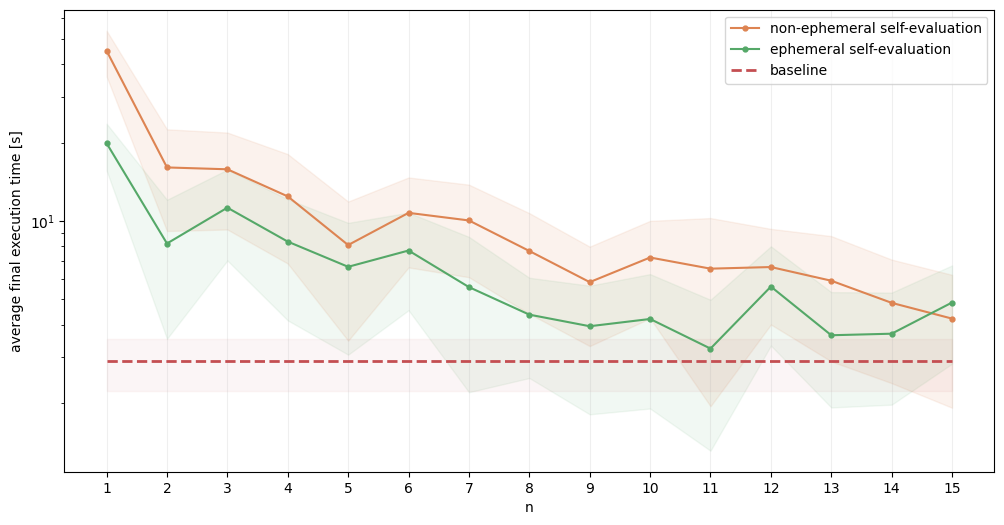

In [8]:
x = list(n_think_indices)[1:] # n-think

fig, ax = plt.subplots(figsize=figsize)

ax.plot(x, final_arrays["non-ephemeral"][0][1:], label="non-ephemeral self-evaluation", marker=".", markersize=7, linestyle="-", color="#dd8452")
ax.plot(x, final_arrays["ephemeral"][0][1:], label="ephemeral self-evaluation", marker=".", markersize=7, linestyle="-", color="#55a868")

ax.fill_between(x,
                np.clip([i[0] for i in final_arrays["non-ephemeral"][1][1:]], 0, a_max=None),
                np.clip([i[1] for i in final_arrays["non-ephemeral"][1][1:]], 0, a_max=None),
                alpha=0.1, color="#dd8452")
ax.fill_between(x,
                np.clip([i[0] for i in final_arrays["ephemeral"][1][1:]], 0, a_max=None),
                np.clip([i[1] for i in final_arrays["ephemeral"][1][1:]], 0, a_max=None),
                alpha=0.08, color="#55a868")

ax.plot([1,15], [final_arrays["non-ephemeral"][0][0], final_arrays["non-ephemeral"][0][0]], label="baseline", linestyle="--", linewidth=2, color='#c44e52')
ax.fill_between([1,15],
                [final_arrays["non-ephemeral"][1][0][0], final_arrays["non-ephemeral"][1][0][0]],
                [final_arrays["non-ephemeral"][1][0][1], final_arrays["non-ephemeral"][1][0][1]],
                alpha=0.05, color="#c44e52")

# ax.set_title(f"Average final score of an ephemeral/non-ephemeral $n$-think model with $n={x[1]},...,{x[-1]}$")
ax.set_xlabel('n')
# ax.set_ylabel('average normalized final score')
ax.set_ylabel('average final execution time [s]')

gridlines = np.arange(x[0], x[-1]+1, 1)
ax.set_xticks(gridlines)
ax.grid(axis="x", alpha=0.2)

ax.semilogy()

ax.legend()
plt.show()